### Logistic regression model 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

In [ ]:
dataset = pd.read_csv("D:/College/Selected/Project/gender_classification_v7.csv")

In [ ]:
dataset.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [ ]:
dataset['gender'] = dataset['gender'].map({'Male':1,'Female':0})

In [ ]:
dataset.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


In [ ]:
dataset.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [ ]:
x = dataset.iloc[:,:-1]

In [ ]:
x

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0
...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0
4997,1,11.9,5.4,0,0,0,0
4998,1,12.9,5.7,0,0,0,0
4999,1,13.2,6.2,0,0,0,0


In [ ]:
y = dataset.iloc[:,-1]
y

0       1
1       0
2       1
3       1
4       0
       ..
4996    0
4997    0
4998    0
4999    0
5000    1
Name: gender, Length: 5001, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=5)

In [ ]:
x_train

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
2348,1,15.0,5.3,1,1,1,1
816,1,12.7,6.3,0,0,0,0
3867,1,13.2,6.3,1,1,1,1
245,1,11.5,5.6,0,0,1,0
3321,1,12.9,5.5,1,1,1,1
...,...,...,...,...,...,...,...
3046,1,14.2,6.0,1,0,0,1
1725,1,11.9,5.7,0,0,0,0
4079,1,11.5,6.0,1,0,1,0
2254,1,13.0,5.2,0,0,0,0


In [ ]:
model = LogisticRegression(max_iter=10)
model.fit(x_train,y_train)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10)

In [ ]:
y_predict = model.predict(x_test)
y_predict

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [ ]:
accuracy_score(y_predict, y_test)

0.938061938061938

In [ ]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_predict,y_test)
cm

array([[461,  36],
       [ 26, 478]], dtype=int64)

<AxesSubplot:>

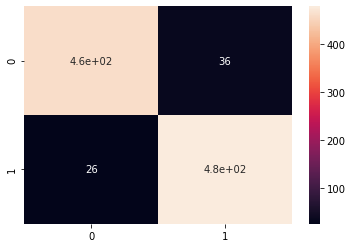

In [ ]:
sns.heatmap(cm, annot=True)

In [ ]:
model.intercept_ 

array([-0.45306848])

In [ ]:
model.coef_

array([[-0.4386542 , -0.21710709, -0.4686    ,  3.3397743 ,  3.22758324,
         3.11865931,  3.25531105]])